In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import classification_report
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [2]:
cars =  pd.read_csv("C:\\Users\\imvv44\\Downloads\\cardata.csv")

In [3]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
cars.info()
cars.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(301, 9)

In [5]:
df = pd.DataFrame(cars)

In [6]:
def overlook(dataframe):
    print('The no. of null values in each column are:\n',df.isnull().sum())
    return

overlook(df)

The no. of null values in each column are:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [7]:
cars.dtypes.index

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
## selecting all categorical variable columns
categorical_columns = cars.dtypes[cars.dtypes == 'object'].index
print(categorical_columns)

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


### cars.shape

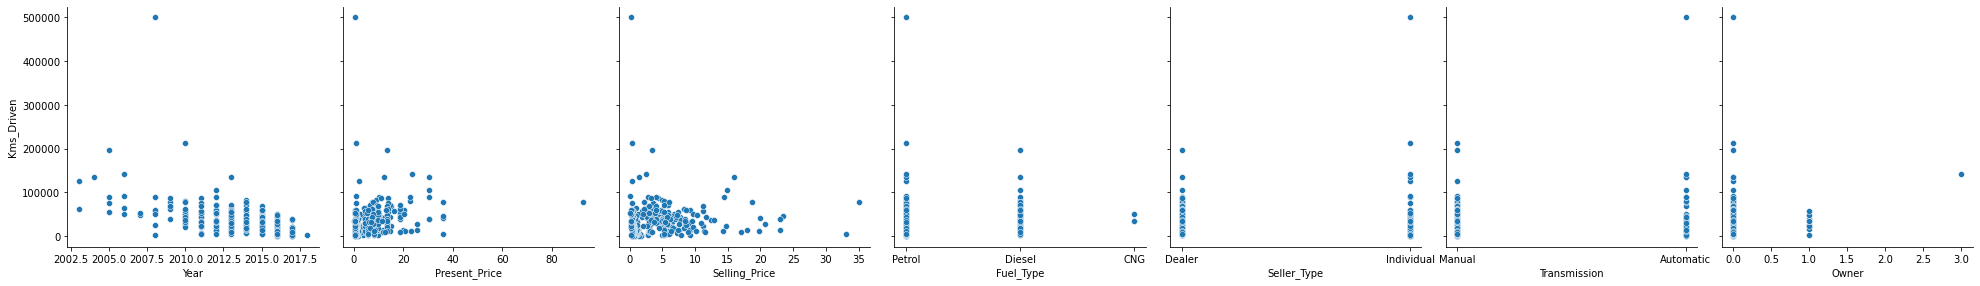

In [9]:
sns.pairplot(cars, x_vars=['Year', 'Present_Price', 'Selling_Price', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], y_vars='Kms_Driven', height=4, aspect=1, kind='scatter')
plt.show()

### Kms_Driven

In [10]:
median = np.median(cars.Kms_Driven)
median

32000.0

In [11]:
upper_quartile = np.percentile(cars.Kms_Driven, 75)
upper_quartile

48767.0

In [12]:
lower_quartile = np.percentile(cars.Kms_Driven, 25)
lower_quartile

15000.0

In [13]:
iqr = upper_quartile - lower_quartile
iqr

33767.0

In [14]:
upper_whisker = cars.Kms_Driven[cars.Kms_Driven<=upper_quartile+1.5*iqr].max()
upper_whisker

92233

In [15]:
lower_whisker = cars.Kms_Driven[cars.Kms_Driven>=lower_quartile-1.5*iqr].min()
lower_whisker

500

In [16]:
cars.Kms_Driven = np.where(cars.Kms_Driven>upper_whisker, upper_whisker, cars.Kms_Driven)

<AxesSubplot:>

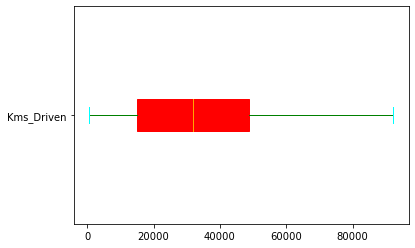

In [17]:
props2 = dict(boxes = 'red', whiskers = 'green', medians= 'orange', caps = 'cyan')
cars['Kms_Driven'].plot.box(color=props2, patch_artist = True, vert = False)

Text(0.5, 1.0, 'Barplot of Kms_Driven')

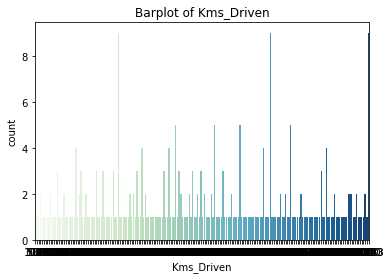

In [18]:
sns.countplot(x = 'Kms_Driven', data = cars, palette = 'GnBu')
plt.title('Barplot of Kms_Driven')

In [19]:
pairedsam =scipy.stats.ttest_rel(cars.Kms_Driven,cars.Year)
print(pairedsam)

Ttest_relResult(statistic=24.06877271411012, pvalue=5.012888345050829e-72)


## Year

In [20]:
cars.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [21]:
mod = ols('Year ~Kms_Driven', data = cars).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

               df       sum_sq      mean_sq           F        PR(>F)
Kms_Driven    1.0  1018.808675  1018.808675  204.511807  1.046408e-35
Residual    299.0  1489.516906     4.981662         NaN           NaN


Text(0.5, 1.0, 'Barplot of Year')

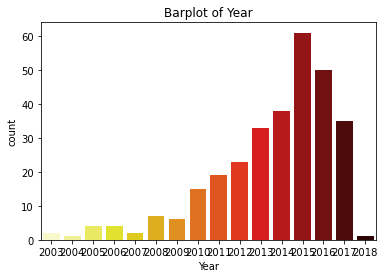

In [22]:
sns.countplot(x = 'Year', data = cars, palette = 'hot_r')
plt.title('Barplot of Year')

## Selling_Price

In [23]:
median = np.median(cars.Selling_Price)
median

3.6

In [24]:
upper_quartile = np.percentile(cars.Selling_Price, 75)
upper_quartile

6.0

In [25]:
lower_quartile = np.percentile(cars.Selling_Price, 25)
lower_quartile

0.9

In [26]:
iqr = upper_quartile - lower_quartile
iqr

5.1

In [27]:
upper_whisker = cars.Selling_Price[cars.Selling_Price<=upper_quartile+1.5*iqr].max()
upper_whisker

12.9

In [28]:
lower_whisker = cars.Selling_Price[cars.Selling_Price>=lower_quartile-1.5*iqr].min()
lower_whisker

0.1

Text(0.5, 1.0, 'Barplot of Present_Price')

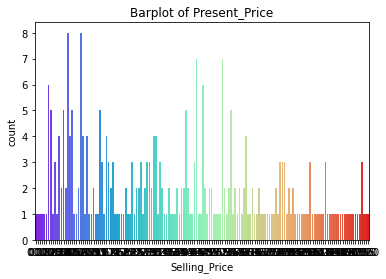

In [29]:
sns.countplot(x = 'Selling_Price', data = cars, palette = 'rainbow')
plt.title('Barplot of Present_Price')

In [30]:
cars.Selling_Price = np.where(cars.Selling_Price>upper_whisker, upper_whisker, cars.Selling_Price)

<AxesSubplot:>

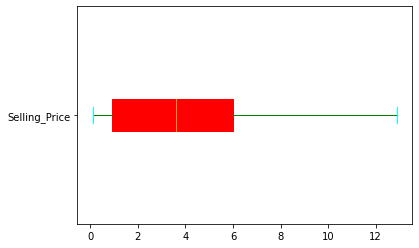

In [31]:
props2 = dict(boxes = 'red', whiskers = 'green', medians= 'orange', caps = 'cyan')
cars['Selling_Price'].plot.box(color=props2, patch_artist = True, vert = False)

In [32]:
pairedsam =scipy.stats.ttest_rel(cars.Kms_Driven,cars.Selling_Price)
print(pairedsam)

Ttest_relResult(statistic=25.572275169904373, pvalue=2.42267468286155e-77)


### Present_Price

In [33]:
median = np.median(cars.Present_Price)
median

6.4

In [34]:
upper_quartile = np.percentile(cars.Present_Price, 75)
upper_quartile

9.9

In [35]:
lower_quartile = np.percentile(cars.Present_Price, 25)
lower_quartile

1.2

In [36]:
iqr = upper_quartile - lower_quartile
iqr

8.700000000000001

In [37]:
upper_whisker = cars.Present_Price[cars.Present_Price<=upper_quartile+1.5*iqr].max()
upper_whisker

22.83

In [38]:
lower_whisker = cars.Present_Price[cars.Present_Price>=lower_quartile-1.5*iqr].min()
lower_whisker

0.32

Text(0.5, 1.0, 'Barplot of Present_Price')

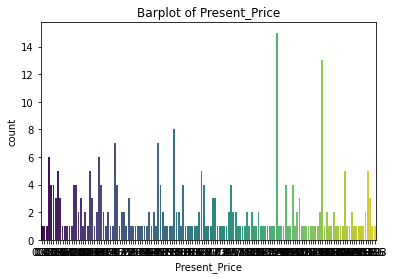

In [39]:
sns.countplot(x = 'Present_Price', data = cars, palette = 'viridis')
plt.title('Barplot of Present_Price')

In [40]:
cars.Present_Price = np.where(cars.Present_Price>upper_whisker, upper_whisker, cars.Present_Price)

<AxesSubplot:>

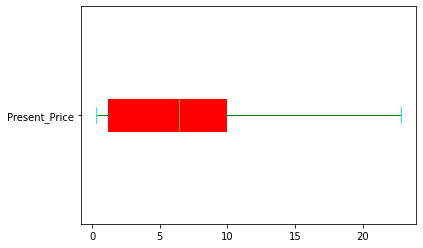

In [41]:
props2 = dict(boxes = 'red', whiskers = 'green', medians= 'orange', caps = 'cyan')
cars['Present_Price'].plot.box(color=props2, patch_artist = True, vert = False)

In [42]:
pairedsam =scipy.stats.ttest_rel(cars.Kms_Driven,cars.Present_Price)
print(pairedsam)

Ttest_relResult(statistic=25.57225796429812, pvalue=2.423010437075592e-77)


## Owner

In [43]:
cars.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [44]:
mod = ols('Owner ~Kms_Driven', data = cars).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

               df     sum_sq   mean_sq         F    PR(>F)
Kms_Driven    1.0   0.128110  0.128110  2.091972  0.149122
Residual    299.0  18.310428  0.061239       NaN       NaN


## Fuel_Type

In [45]:
cars.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [46]:
mod = ols('Kms_Driven ~Fuel_Type', data = cars).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df        sum_sq       mean_sq          F    PR(>F)
Fuel_Type    2.0  1.386964e+10  6.934820e+09  13.968574  0.000002
Residual   298.0  1.479447e+11  4.964587e+08        NaN       NaN


Text(0.5, 1.0, 'Barplot of Fuel_Type')

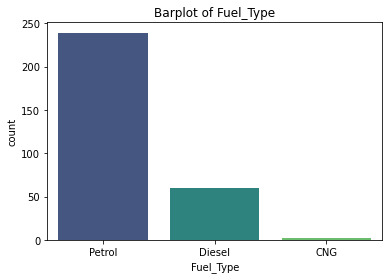

In [47]:
sns.countplot(x = 'Fuel_Type', data = cars, palette = 'viridis')
plt.title('Barplot of Fuel_Type')

## Seller_Type

In [48]:
cars.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [49]:
mod = ols('Kms_Driven ~Seller_Type', data = cars).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                df        sum_sq       mean_sq          F        PR(>F)
Seller_Type    1.0  1.271653e+10  1.271653e+10  25.501667  7.699247e-07
Residual     299.0  1.490978e+11  4.986549e+08        NaN           NaN


Text(0.5, 1.0, 'Barplot of Seller_Type')

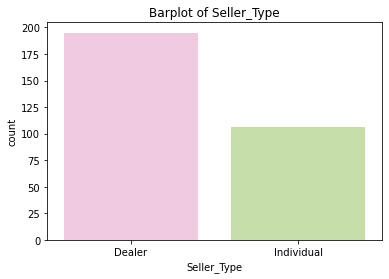

In [50]:
sns.countplot(x = 'Seller_Type', data = cars, palette = 'PiYG')
plt.title('Barplot of Seller_Type')

## Transmission 

In [51]:
cars.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [52]:
mod = ols('Kms_Driven ~Transmission', data = cars).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
Transmission    1.0  1.123425e+09  1.123425e+09  2.090373  0.149277
Residual      299.0  1.606909e+11  5.374278e+08       NaN       NaN


## Drop

In [53]:
cars = cars.drop(['Transmission', 'Owner', 'Car_Name'], axis = 1)

## Vif

In [54]:
x = df.iloc[:, [2,3]]

In [55]:
vif_data = pd.DataFrame()
vif_data["features"] = x.columns

In [56]:
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                           for i in range(len(x.columns))]

In [57]:
print(vif_data)
                 

        features       VIF
0  Selling_Price  9.138486
1  Present_Price  9.138486


## Corelation

In [58]:
countinue_column = cars.select_dtypes(include= 'number')

In [59]:
print(countinue_column)

     Year  Selling_Price  Present_Price  Kms_Driven
0    2014           3.35           5.59       27000
1    2013           4.75           9.54       43000
2    2017           7.25           9.85        6900
3    2011           2.85           4.15        5200
4    2014           4.60           6.87       42450
..    ...            ...            ...         ...
296  2016           9.50          11.60       33988
297  2015           4.00           5.90       60000
298  2009           3.35          11.00       87934
299  2017          11.50          12.50        9000
300  2016           5.30           5.90        5464

[301 rows x 4 columns]


In [60]:
countinue_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


In [61]:
countinue_column.corr()

,Year,Selling_Price,Present_Price,Kms_Driven
Year,1.000000,0.284571,-0.033135,-0.637315
Selling_Price,0.284571,1.000000,0.868346,0.129921
Present_Price,-0.033135,0.868346,1.000000,0.388070
Kms_Driven,-0.637315,0.129921,0.388070,1.000000


<AxesSubplot:>

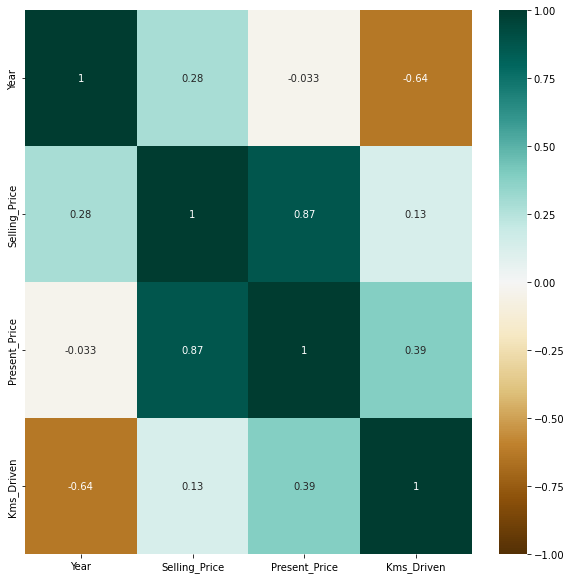

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(countinue_column.corr(), annot=True, vmin= -1, vmax=1, cmap = 'BrBG')

In [63]:
model = smf.ols(formula='Kms_Driven~ Year + Selling_Price + Present_Price', data=cars).fit()

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Kms_Driven   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     117.1
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           4.69e-50
Time:                        22:59:58   Log-Likelihood:                -3335.1
No. Observations:                 301   AIC:                             6678.
Df Residuals:                     297   BIC:                             6693.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.751e+06    8.2e+05     11.891

In [65]:
cars.drop(columns= ['Selling_Price'], axis= 1, inplace= True)

In [66]:
model2 = smf.ols(formula='Kms_Driven~ Year + Present_Price', data=cars).fit()

In [67]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Kms_Driven   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     175.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           4.11e-51
Time:                        23:00:00   Log-Likelihood:                -3335.4
No. Observations:                 301   AIC:                             6677.
Df Residuals:                     298   BIC:                             6688.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.013e+07   6.35e+05     15.957

In [73]:
trn = cars.iloc[0:225]
tst = cars.iloc[225:301]

In [76]:
model3 = smf.ols(formula='Kms_Driven~ Year + Present_Price', data=trn).fit()

In [77]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             Kms_Driven   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     141.7
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           2.24e-40
Time:                        23:09:57   Log-Likelihood:                -2499.4
No. Observations:                 225   AIC:                             5005.
Df Residuals:                     222   BIC:                             5015.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.817e+06   7.11e+05     13.798

In [78]:
model4 = smf.ols(formula='Kms_Driven~ Year + Present_Price', data=tst).fit()

In [79]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:             Kms_Driven   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     32.00
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.05e-10
Time:                        23:10:33   Log-Likelihood:                -833.77
No. Observations:                  76   AIC:                             1674.
Df Residuals:                      73   BIC:                             1681.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.24e+07   1.59e+06      7.806

In [80]:
tst_x = tst.loc[:,tst.columns != 'Kms_Driven']
tst_y = tst.loc[:,tst.columns == 'Kms_Driven']

In [81]:
pred_1 = model4.predict(tst_x)
pred_1

225    45444.097601
226    22928.565448
227    45124.521286
228    48321.584145
229    43415.147767
           ...     
296    27873.898741
297    23304.537584
298    69766.895412
299    23419.928628
300    17158.692859
Length: 76, dtype: float64

In [82]:
pred_1.shape

(76,)

In [83]:
y_test_series = tst_y.iloc[:,0] 

In [84]:
resd_1 = y_test_series - pred_1

In [85]:
resd_1

225   -22927.097601
226     1749.434552
227    11875.478714
228    11678.415855
229     8716.852233
           ...     
296     6114.101259
297    36695.462416
298    18167.104588
299   -14419.928628
300   -11694.692859
Length: 76, dtype: float64

In [86]:
se_1=resd_1.pow(2)
se_1

225    5.256518e+08
226    3.060521e+06
227    1.410270e+08
228    1.363854e+08
229    7.598351e+07
           ...     
296    3.738223e+07
297    1.346557e+09
298    3.300437e+08
299    2.079343e+08
300    1.367658e+08
Length: 76, dtype: float64

In [88]:
#Sum of Squared errors/residuals
sse_1 = se_1.sum()
sse_1

15043406289.603762

In [89]:
#Mean sum squared errors
msse_1=sse_1/len(se_1)
msse_1

197939556.44215477

In [91]:
import math
math.sqrt(msse_1)

14069.099347227411

In [92]:
obsno=np.arange(0,76,1)

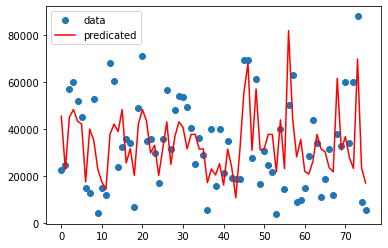

In [93]:
fig,ax=plt.subplots()
ax.plot(obsno,y_test_series,"o",label="data")
ax.plot(obsno,pred_1,"r-",label="predicated")
ax.legend(loc="best")

<AxesSubplot:ylabel='Density'>

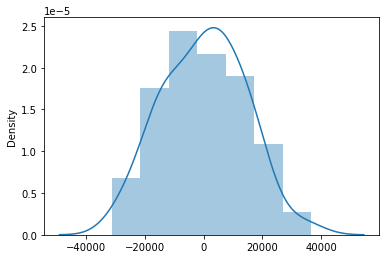

In [94]:
sns.distplot(resd_1)